In [1]:
# Import packages
import os
import re
import json
import requests
import pandas as pd
import datetime
from datetime import datetime
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np
from shapely.geometry import box

In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Set the working directory
os.chdir('/content/drive/MyDrive/ursp688y/Final Project')

In [4]:
cb2020 = gpd.read_file('2020_Census_Blocks_Fairfax_County.shp')

In [9]:
# Read CSV file containing Reston and Tysons Population since 1970 and 1980 respectively

population_data = pd.read_csv("Tysons and Reston Pop Data Updated.csv")
population_data.head()

,Year,Reston,Tysons
0,1970,5722,NaN
1,1980,36407,10065.0
2,1990,48556,13124.0
3,2000,56407,18540.0
4,2010,58404,19627.0


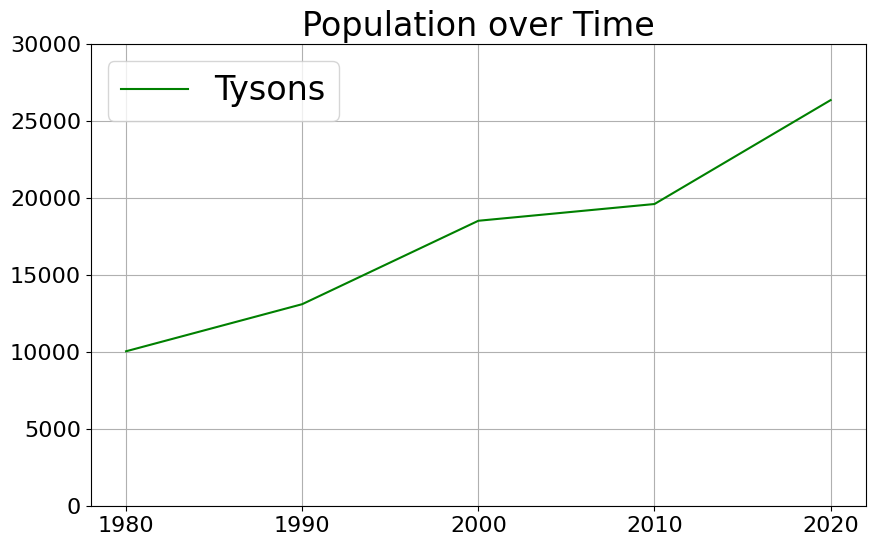

In [10]:
# Plot population for Tysons

plt.figure(figsize=(10, 6))  # Adjust figure size as needed

plt.plot(population_data['Year'], population_data['Tysons'], label='Tysons', color='green')

# Adding labels and title
# plt.xlabel('Year', fontsize=20)
# plt.ylabel('Population', fontsize=20)
plt.title('Population over Time', fontsize=24)
plt.legend(fontsize=24)

plt.xticks(fontsize=16)  # Adjust fontsize as needed
plt.yticks(fontsize=16)  # Adjust fontsize as needed

# Specify the y-axis range to go up to 30000
plt.ylim(0, 30000)

# Specify the x-axis ticks every 10 years starting from 1980
start_year = 1980
plt.xticks(range(start_year, population_data['Year'].max()+1, 10), fontsize=16)

# Specify the y-axis ticks every 5000
plt.yticks(range(0, 30001, 5000), fontsize=16)

# Show plot
plt.grid(True)  # Add grid for better readability, optional

plt.savefig('Tysons Population Plot.png')

plt.show()

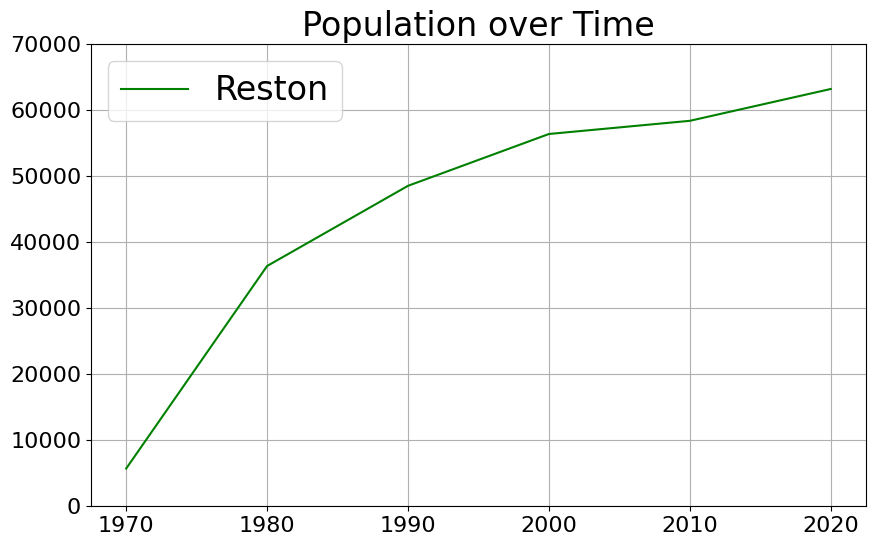

In [8]:
# Plot population for Reston

plt.figure(figsize=(10, 6))  # Adjust figure size as needed

plt.plot(population_data['Year'], population_data['Reston'], label='Reston', color='green')

# Adding labels and title
# plt.xlabel('Year', fontsize=20)
# plt.ylabel('Population', fontsize=20)
plt.title('Population over Time', fontsize=24)
plt.legend(fontsize=24)

plt.xticks(fontsize=16)  # Adjust fontsize as needed
plt.yticks(fontsize=16)  # Adjust fontsize as needed

# Specify the y-axis range to go up to 30000
# plt.ylim(0, 30000)

# Specify the x-axis ticks every 10 years starting from 1980
start_year = 1970
plt.xticks(range(start_year, population_data['Year'].max()+1, 10), fontsize=16)

# Specify the y-axis ticks every 5000
plt.yticks(range(0, 70001, 10000), fontsize=16)

# Show plot
plt.grid(True)  # Add grid for better readability, optional

plt.savefig('Reston Population Plot.png')

plt.show()

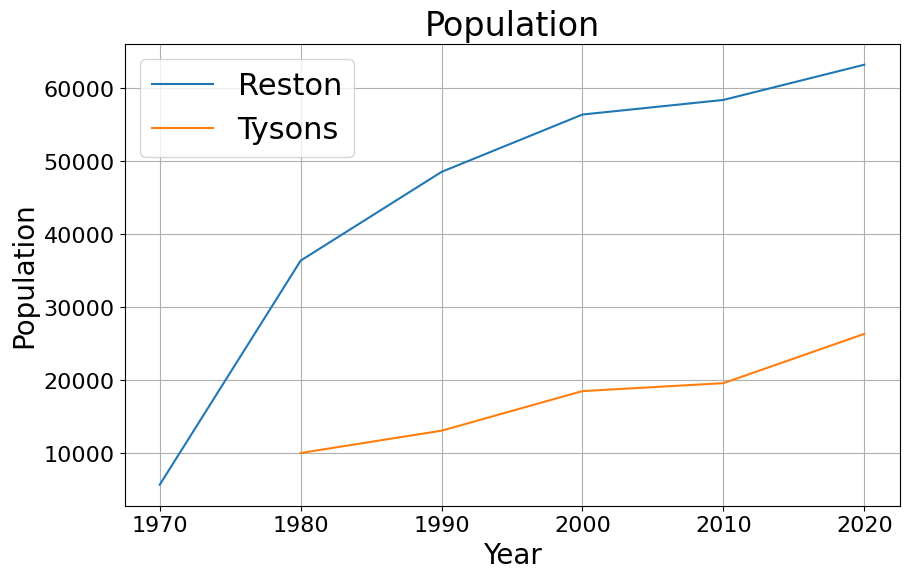

In [ ]:
# Plot populations for Tysons and Reston concurrently. I did not wind up using this graph.

plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.plot(population_data['Year'], population_data['Reston'], label='Reston')
plt.plot(population_data['Year'], population_data['Tysons'], label='Tysons')

# Adding labels and title
plt.xlabel('Year', fontsize=20)
plt.ylabel('Population', fontsize=20)
plt.title('Population', fontsize=24)
plt.legend(fontsize=22)

plt.xticks(fontsize=16)  # Adjust fontsize as needed
plt.yticks(fontsize=16)  # Adjust fontsize as needed

# Show plot
plt.grid(True)  # Add grid for better readability, optional

plt.savefig('Reston and Tysons Population Plot.png')

plt.show()

In [11]:
# Read CSV file containing all units within 0.5 miles

housing_units = pd.read_csv("Housing Units within 0.5 miles Updated.csv")

In [12]:
# I considered renaming the housing types within the data frame but wound up not using this code.

# housing_units.loc[housing_units['HOUSI_UNIT'] == 'MR', 'TYPE'] = 'Mid Rise'
# housing_units.loc[housing_units['HOUSI_UNIT'] == 'HR', 'TYPE'] = 'High Rise'
# housing_units.loc[housing_units['HOUSI_UNIT'] == 'LR', 'TYPE'] = 'Low Rise'
# housing_units.loc[housing_units['HOUSI_UNIT'] == 'SF', 'TYPE'] = 'Single Family'
# housing_units.loc[housing_units['HOUSI_UNIT'] == 'TH', 'TYPE'] = 'Town House'
# housing_units.loc[housing_units['HOUSI_UNIT'] == 'DP', 'TYPE'] = 'Duplex'
# housing_units.loc[housing_units['HOUSI_UNIT'] == 'MP', 'TYPE'] = 'Multi Plex'
# housing_units.loc[housing_units['HOUSI_UNIT'] == 'MH', 'TYPE'] = 'Mobile Home'

In [13]:
# Create a dict to match each housing type of a color for visual consistency throughout the maps and graphs

housing_type_colors = {'DP': 'teal', 'HR': 'darkviolet', 'LR': 'red',
                       'MH': 'yellowgreen', 'MP': 'orange', 'MR': 'hotpink',
                       'SF': 'tan', 'TH': 'deepskyblue'}

In [14]:
# Create a dict to match each housing type of a color for visual consistency throughout the maps and graphs
# I wound up not using full names to allow for bigger text on the graphs to see the labels better.

housing_type_colors_full = {'Duplex': 'teal', 'High Rise': 'darkviolet', 'Low Rise': 'red',
                       'Mobile Home': 'yellowgreen', 'Multi Plex': 'orange', 'Mid Rise': 'hotpink',
                       'Single Family': 'tan', 'Town House': 'deepskyblue'}

In [19]:
# I renamed the column from HOUSI_UNIT to "Housing Type" to make the graph titles clearer
housing_units.rename(columns = {'HOUSI_UNIT':'Housing Type'}, inplace = True)

In [21]:
# Create the Tysons Post 2004 Housing Dataframe by filtering out all units closest to Reston East and built before 2004
post2004Tysonsdf = housing_units[(housing_units.YEAR_BUILT >= 2004) & (housing_units.NEAR_FID != 676)]

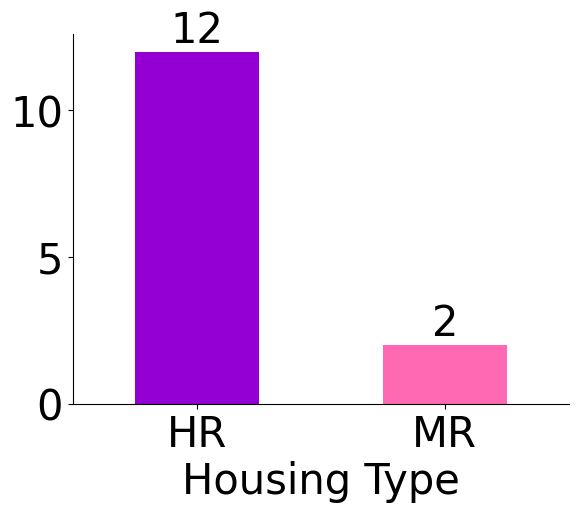

In [23]:
# Create transparent bar chart with labels to place on the Reston East Housing Post 2004 slide
# This code will also save the bar chart as an image file which can be downloaded from google drive.

# Group by 'Housing Type' and calculate the size of each group
grouped_data = post2004Tysonsdf.groupby('Housing Type').size()

# Plot the bar chart
ax = grouped_data.plot(kind='bar', color=[housing_type_colors[h_type] for h_type in grouped_data.index])

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Increase font size for x and y-axis labels
ax.set_xlabel(ax.get_xlabel(), fontsize=30)
ax.set_ylabel(ax.get_ylabel(), fontsize=30)

# Increase font size for x and y-axis tick labels
ax.tick_params(axis='x', labelsize=30)
ax.tick_params(axis='y', labelsize=30)

# Add labels to the bars with increased font size
for i, value in enumerate(grouped_data):
    ax.text(i, value, str(value), ha='center', va='bottom', fontsize=30)

# Rotate the x-axis labels to make them horizontal
ax.set_xticklabels(grouped_data.index, rotation=0, fontsize=30)

# Set the facecolor of the figure to 'none'
ax.figure.patch.set_facecolor('none')

# Save the plot with a transparent background
plt.savefig('Post 2004 Tysons Housing Graph.png', transparent=True)

# Show the plot

plt.show()

In [24]:
# Create the Tysons Pre 2004 Housing Dataframe by filtering out all units closest to Reston East and built during or after 2004
pre2004Tysonsdf = housing_units[(housing_units.YEAR_BUILT < 2004) & (housing_units.NEAR_FID != 676)]
pre2004Tysonsdf.head()

,FID,OBJECTID,PIN,PARCE_ID,VALID_FROM,VALID_TO,CURRE_UNIT,Housing Type,LUC,YEAR_BUILT,STRUC_DESC,NEAR_FID,NEAR_DIST,Type
4,37367,37368,0294 12010308,455554,,2023-01-01,1,LR,41,1997,,658,0.002623,NaN
13,27765,27766,0294 12100201,444094,,2023-01-01,1,LR,41,1997,,658,0.003221,NaN
14,28072,28073,0294 12020414,446068,,2023-01-01,1,LR,41,1997,,658,0.003224,NaN
20,28077,28078,0294 12030314,444795,,2023-01-01,1,LR,41,1997,,658,0.003447,NaN
42,29269,29270,0294 12090217,455828,,2023-01-01,1,LR,41,1997,,658,0.003894,NaN


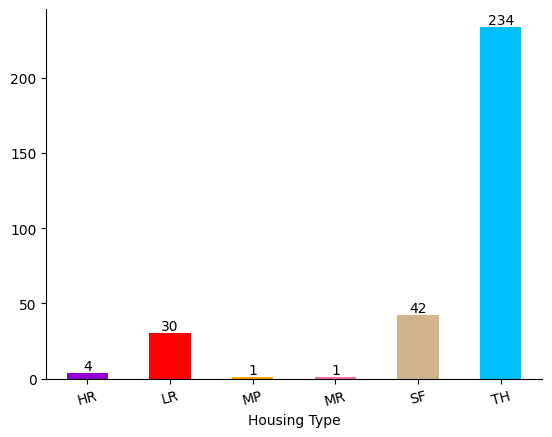

In [25]:
# Group by 'Housing Type' and calculate the size of each group
grouped_data = pre2004Tysonsdf.groupby('Housing Type').size()

ax = grouped_data.plot(kind='bar', color=[housing_type_colors[h_type] for h_type in grouped_data.index])

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add labels to the bars
for i, value in enumerate(grouped_data):
    ax.text(i, value, str(value), ha='center', va='bottom')

# Rotate the x-axis labels to make them horizontal
ax.set_xticklabels(grouped_data.index, rotation=15)

# Show the plot
# plt.show()

plt.savefig("Pre 2004 Tysons Housing Graph.jpg", transparent=True)

In [26]:
# Create the Reston East Pre 2004 Housing Dataframe by filtering out all units with the closest station not being Reston East and built before 2004

post2004Restondf = housing_units[(housing_units.YEAR_BUILT >= 2004) & (housing_units.NEAR_FID == 676)]

In [27]:
# Create the Reston East Pre 2004 Housing Dataframe by filtering out all units with the closest station not being Reston East and built during or after 2004

pre2004Restondf = housing_units[(housing_units.YEAR_BUILT < 2004) & (housing_units.NEAR_FID == 676)]

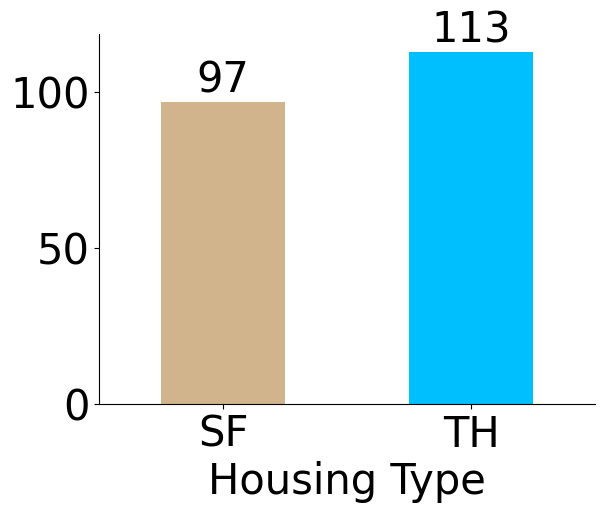

In [28]:
# Create transparent bar chart with labels to place on the Reston East Housing Pre 2004 slide
# This code will also save the bar chart as an image file which can be downloaded from google drive.

# Group by 'Housing Type' and calculate the size of each group
grouped_data = pre2004Restondf.groupby('Housing Type').size()

# Plot the bar chart
ax = grouped_data.plot(kind='bar', color=[housing_type_colors[h_type] for h_type in grouped_data.index])

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Increase font size for x and y-axis labels
ax.set_xlabel(ax.get_xlabel(), fontsize=30)
ax.set_ylabel(ax.get_ylabel(), fontsize=30)

# Increase font size for x and y-axis tick labels
ax.tick_params(axis='x', labelsize=30)
ax.tick_params(axis='y', labelsize=30)

# Add labels to the bars with increased font size
for i, value in enumerate(grouped_data):
    ax.text(i, value, str(value), ha='center', va='bottom', fontsize=30)

# Rotate the x-axis labels to make them horizontal
ax.set_xticklabels(grouped_data.index, rotation=0, fontsize=30)

# Set the facecolor of the figure to 'none'
ax.figure.patch.set_facecolor('none')

# Save the plot with a transparent background
plt.savefig('Pre 2004 Reston Housing Graph.png', transparent=True)

# Show the plot
plt.show()

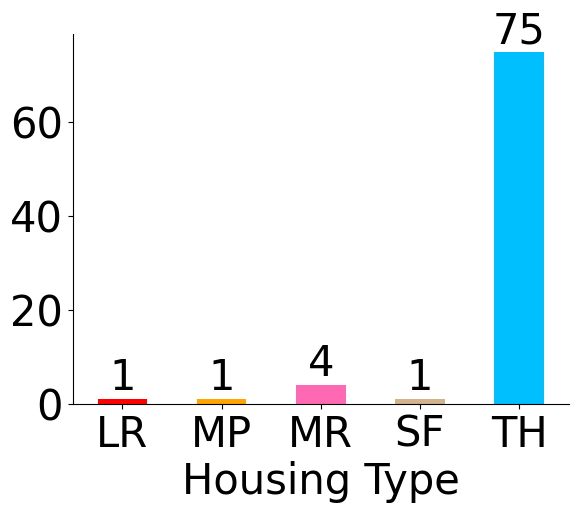

In [30]:
# Create transparent bar chart with labels to place on the Reston East Housing Post 2004 slide
# This code will also save the bar chart as an image file which can be downloaded from google drive.

# Group by 'Housing Type' and calculate the size of each group
grouped_data = post2004Restondf.groupby('Housing Type').size()

# Plot the bar chart. The colors will be coordinated from the housing_type_colors_dict to match the map
ax = grouped_data.plot(kind='bar', color=[housing_type_colors[h_type] for h_type in grouped_data.index])

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Increase font size for x and y-axis labels
ax.set_xlabel(ax.get_xlabel(), fontsize=30)
ax.set_ylabel(ax.get_ylabel(), fontsize=30)

# Increase font size for x and y-axis tick labels
ax.tick_params(axis='x', labelsize=30)
ax.tick_params(axis='y', labelsize=30)

# Add labels to the bars with increased font size
for i, value in enumerate(grouped_data):
    ax.text(i, value, str(value), ha='center', va='bottom', fontsize=30)

# Rotate the x-axis labels to make them horizontal
ax.set_xticklabels(grouped_data.index, rotation=0, fontsize=30)

# Set the facecolor of the figure to 'none'
ax.figure.patch.set_facecolor('none')

# Save the plot with a transparent background
plt.savefig('Post 2004 Reston Housing Graph.png', transparent=True)

# Show the plot
plt.show()

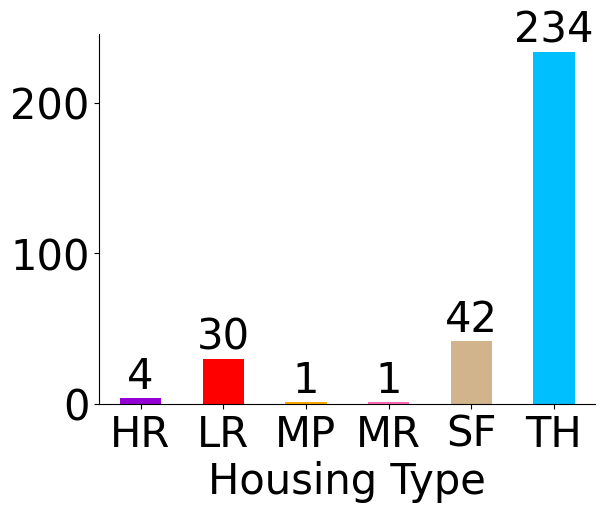

In [31]:
# Create transparent bar chart with labels to place on the Tysons Housing pre 2004 slide
# This code will also save the bar chart as an image file which can be downloaded from google drive.

grouped_data = pre2004Tysonsdf.groupby('Housing Type').size()

# Plot the bar chart. The colors will be coordinated from the housing_type_colors_dict to match the map
ax = grouped_data.plot(kind='bar', color=[housing_type_colors[h_type] for h_type in grouped_data.index])

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Increase font size for x and y-axis labels
ax.set_xlabel(ax.get_xlabel(), fontsize=30)
ax.set_ylabel(ax.get_ylabel(), fontsize=30)

# Increase font size for x and y-axis tick labels
ax.tick_params(axis='x', labelsize=30)
ax.tick_params(axis='y', labelsize=30)

# Add labels to the bars with increased font size
for i, value in enumerate(grouped_data):
    ax.text(i, value, str(value), ha='center', va='bottom', fontsize=30)

# Rotate the x-axis labels to make them horizontal
ax.set_xticklabels(grouped_data.index, rotation=0, fontsize=30)

# Set the facecolor of the figure to 'none'
ax.figure.patch.set_facecolor('none')

# Save the plot with a transparent background
plt.savefig('Pre 2004 Tysons Housing Graph.png', transparent=True)

# Show the plot
plt.show()